In [17]:
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [18]:
eng_stopwords = set(stopwords.words("english"))


In [19]:
df_yout=pd.read_csv("US_youtube_trending_data.csv")

In [20]:
df_yout["trending_date"] = pd.to_datetime(df_yout["trending_date"])
df_yout=df_yout[(df_yout["trending_date"].dt.year == 2023)& (df_yout["trending_date"].dt.month == 3)]


In [21]:
df_yout

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
186990,9Ji5U2sTlLU,Peter Pan & Wendy | Official Trailer | Disney+,2023-02-28T17:00:48Z,UCuaFvcY4MhZY3U43mMt1dYQ,Walt Disney Studios,1,2023-03-01 00:00:00+00:00,[None],1013950,24841,0,8490,https://i.ytimg.com/vi/9Ji5U2sTlLU/default.jpg,False,False,"This year, return to Neverland. ✨ Watch the tr..."
186991,kT7QqQ8DTNI,Jake Paul vs. Tommy Fury | Highlights | ESPN R...,2023-02-26T23:28:34Z,UCiWLfSweyRNmLpgEHekhoAg,ESPN,17,2023-03-01 00:00:00+00:00,espn|sports|jake paul|jake paul tommy fury|min...,4014271,43067,0,11578,https://i.ytimg.com/vi/kT7QqQ8DTNI/default.jpg,False,False,Check out these highlights from Tommy Fury's s...
186992,M-K7mxdN62M,Your Immune System is More Dangerous than You ...,2023-02-28T14:59:23Z,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,2023-03-01 00:00:00+00:00,[None],1603067,104195,0,7383,https://i.ytimg.com/vi/M-K7mxdN62M/default.jpg,False,False,Offset your carbon footprint on Wren: ​https:/...
186993,VDtFyTerbjY,UFC 285 Embedded: Vlog Series - Episode 2,2023-02-28T18:27:48Z,UCvgfXK4nTYKudb0rFR6noLA,UFC - Ultimate Fighting Championship,17,2023-03-01 00:00:00+00:00,ufc|mma|ultimate fighting championship|Jon Jon...,1035502,23800,0,2913,https://i.ytimg.com/vi/VDtFyTerbjY/default.jpg,False,False,Ciryl Gane enjoys the great outdoors. Jon Jone...
186994,V2x8ts5STzY,True Facts: Mussels That Catch Fish,2023-02-28T17:00:18Z,UCVpankR4HtoAVtYnFDUieYA,Ze Frank,15,2023-03-01 00:00:00+00:00,[None],608771,46135,0,1765,https://i.ytimg.com/vi/V2x8ts5STzY/default.jpg,False,False,Use the link http://www.nordvpn.com/zefrank to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190185,HPVpHGscjH0,Ashnikko - Worms (Official Music Video),2023-03-08T20:00:07Z,UCprhwr86ckrMC2q9jX8qMnw,Ashnikko,10,2023-03-16 00:00:00+00:00,Ashnikko|AshnikkoMusic|Ashnikkoofficial|Hip-Ho...,705997,65293,0,2375,https://i.ytimg.com/vi/HPVpHGscjH0/default.jpg,False,False,The official music video for Ashnikko - WormsT...
190186,1_qRsCQdzuE,"Los Ángeles Azules, Santa Fe Klan, Cazzu - Tú ...",2023-03-10T02:00:09Z,UCYTPYsuIRSu7o9xmeB_L4_g,Los Ángeles Azules,10,2023-03-16 00:00:00+00:00,los angeles azules|los angeles azules 17 años|...,5721444,220732,0,6592,https://i.ytimg.com/vi/1_qRsCQdzuE/default.jpg,False,False,"La nueva canción de Los Ángeles Azules, Santa ..."
190187,S698DWXhu5I,Depeche Mode - My Cosmos Is Mine (Official Audio),2023-03-09T16:00:23Z,UC90vR_MFeheV3V6nmjvXIng,DepecheModeVEVO,10,2023-03-16 00:00:00+00:00,Memento Mori|Ghosts Again|Depeche Mode New Mus...,1427985,28673,0,3153,https://i.ytimg.com/vi/S698DWXhu5I/default.jpg,False,False,Official Audio for “My Cosmos Is Mine” by Depe...
190188,-TKkCfQ4hMg,"Getting As Rich As Possible, But I Only Get On...",2023-03-08T18:49:50Z,UC_GDu2QH3kp6vJlgEYyqjUA,Kolanii,20,2023-03-16 00:00:00+00:00,Minecraft|One block skyblock|Hardcore|Kolanii,653604,42276,0,1638,https://i.ytimg.com/vi/-TKkCfQ4hMg/default.jpg,False,False,🕹️ Download for FREE: https://operagx.gg/Kolan...


In [22]:
#Word count in each comment:
df_yout['count_word']=df_yout["title"].apply(lambda x: len(str(x).split()))
df_yout['count_word_tags']=df_yout["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df_yout['count_unique_word']=df_yout["title"].apply(lambda x: len(set(str(x).split())))
df_yout['count_unique_word_tags']=df_yout["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_yout['count_letters']=df_yout["title"].apply(lambda x: len(str(x)))
df_yout['count_letters_tags']=df_yout["tags"].apply(lambda x: len(str(x)))

#punctuation count
df_yout["count_punctuations"] =df_yout["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_yout["count_punctuations_tags"] =df_yout["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_yout["count_words_upper"] = df_yout["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_yout["count_words_upper_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_yout["count_words_title"] = df_yout["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_yout["count_words_title_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_yout["count_stopwords"] = df_yout["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_yout["count_stopwords_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df_yout["mean_word_len"] = df_yout["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_yout["mean_word_len_tags"] = df_yout["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [23]:
#derived features
#Word count percent in each comment:
df_yout['word_unique_percent']=df_yout['count_unique_word']*100/df_yout['count_word']
df_yout['word_unique_percent_tags']=df_yout['count_unique_word_tags']*100/df_yout['count_word_tags']

#Punct percent in each comment:
df_yout['punct_percent']=df_yout['count_punctuations']*100/df_yout['count_word']
df_yout['punct_percent_tags']=df_yout['count_punctuations_tags']*100/df_yout['count_word_tags']

d:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

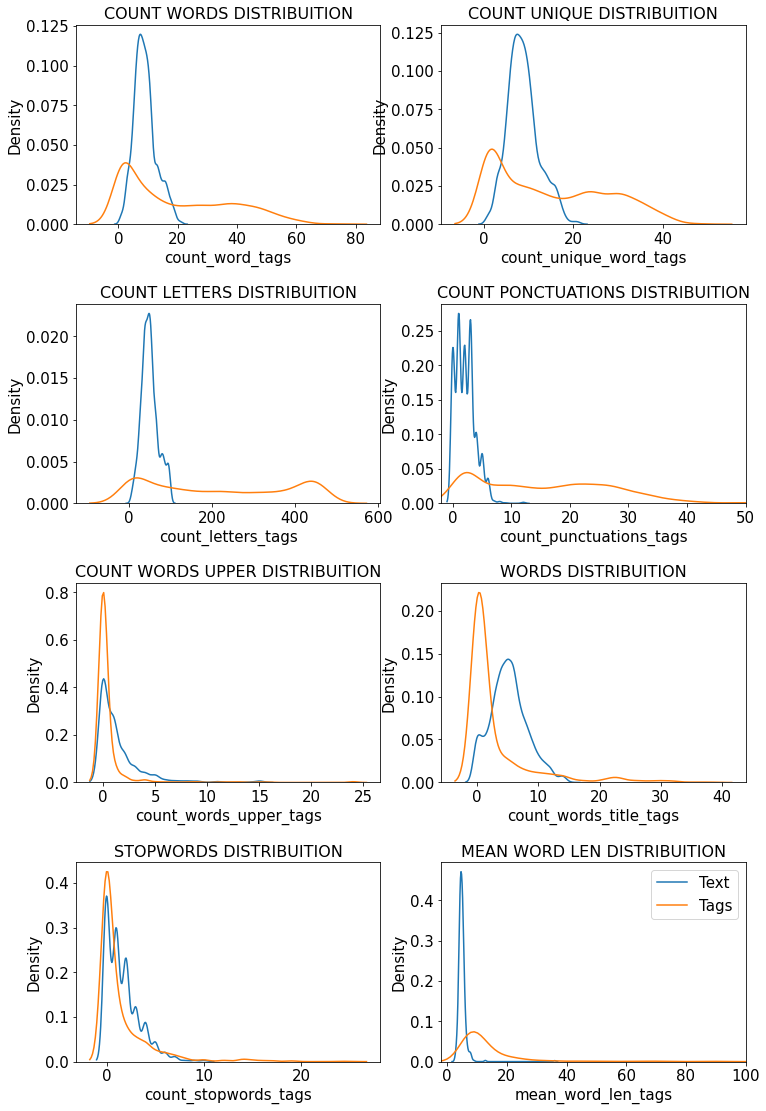

In [24]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_yout['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df_yout['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df_yout['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df_yout['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df_yout['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df_yout['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df_yout["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df_yout["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df_yout["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df_yout["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df_yout["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df_yout["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df_yout["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df_yout["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df_yout["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df_yout["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

In [25]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

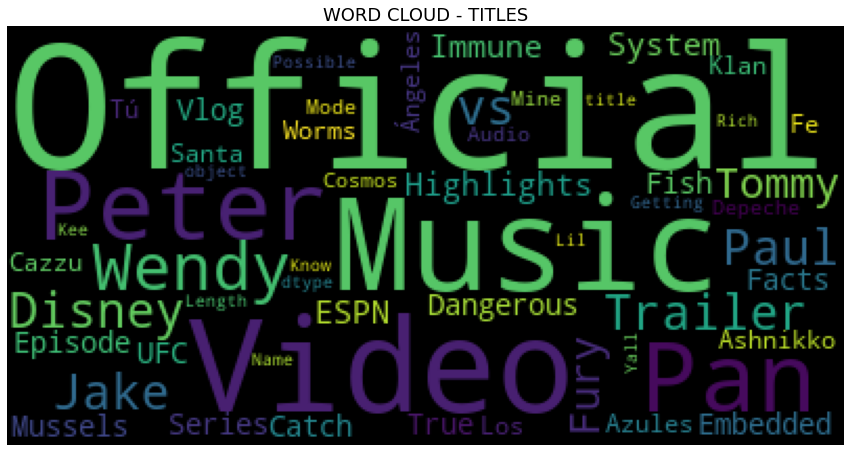

In [26]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

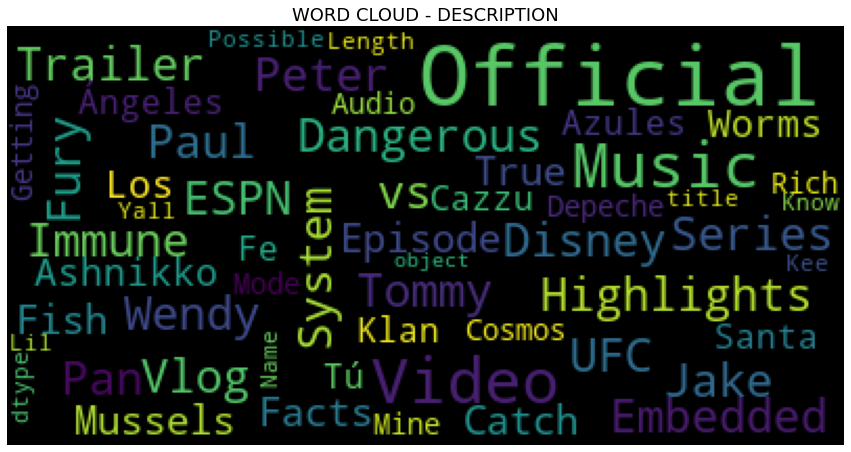

In [27]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

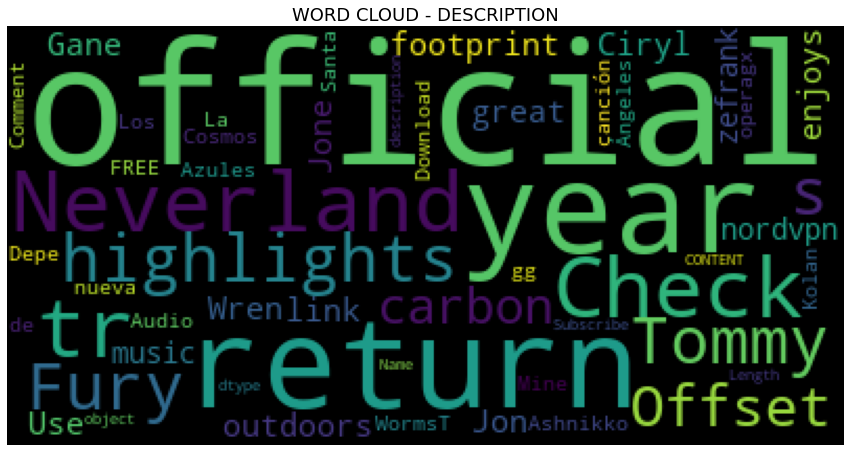

In [28]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_yout['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()